In [2]:
!pip install prophet

In [3]:
from prophet import Prophet

In [4]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # Visualization tool like Matplotlib
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [5]:
#GEtting Plotly offline 
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)

In [9]:

df.rename(columns={'Province/State':'State'}, inplace=True)

In [10]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


### Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   State            228329 non-null  object 
 3   Country          306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [12]:

df.isnull().sum()

SNo                    0
ObservationDate        0
State              78100
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [13]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


### Data Visualization

In [14]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed


,ObservationDate,Confirmed
0,01/01/2021,84092619.0
1,01/02/2021,84718978.0
2,01/03/2021,85251774.0
3,01/04/2021,85805892.0
4,01/05/2021,86546014.0
...,...,...
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0


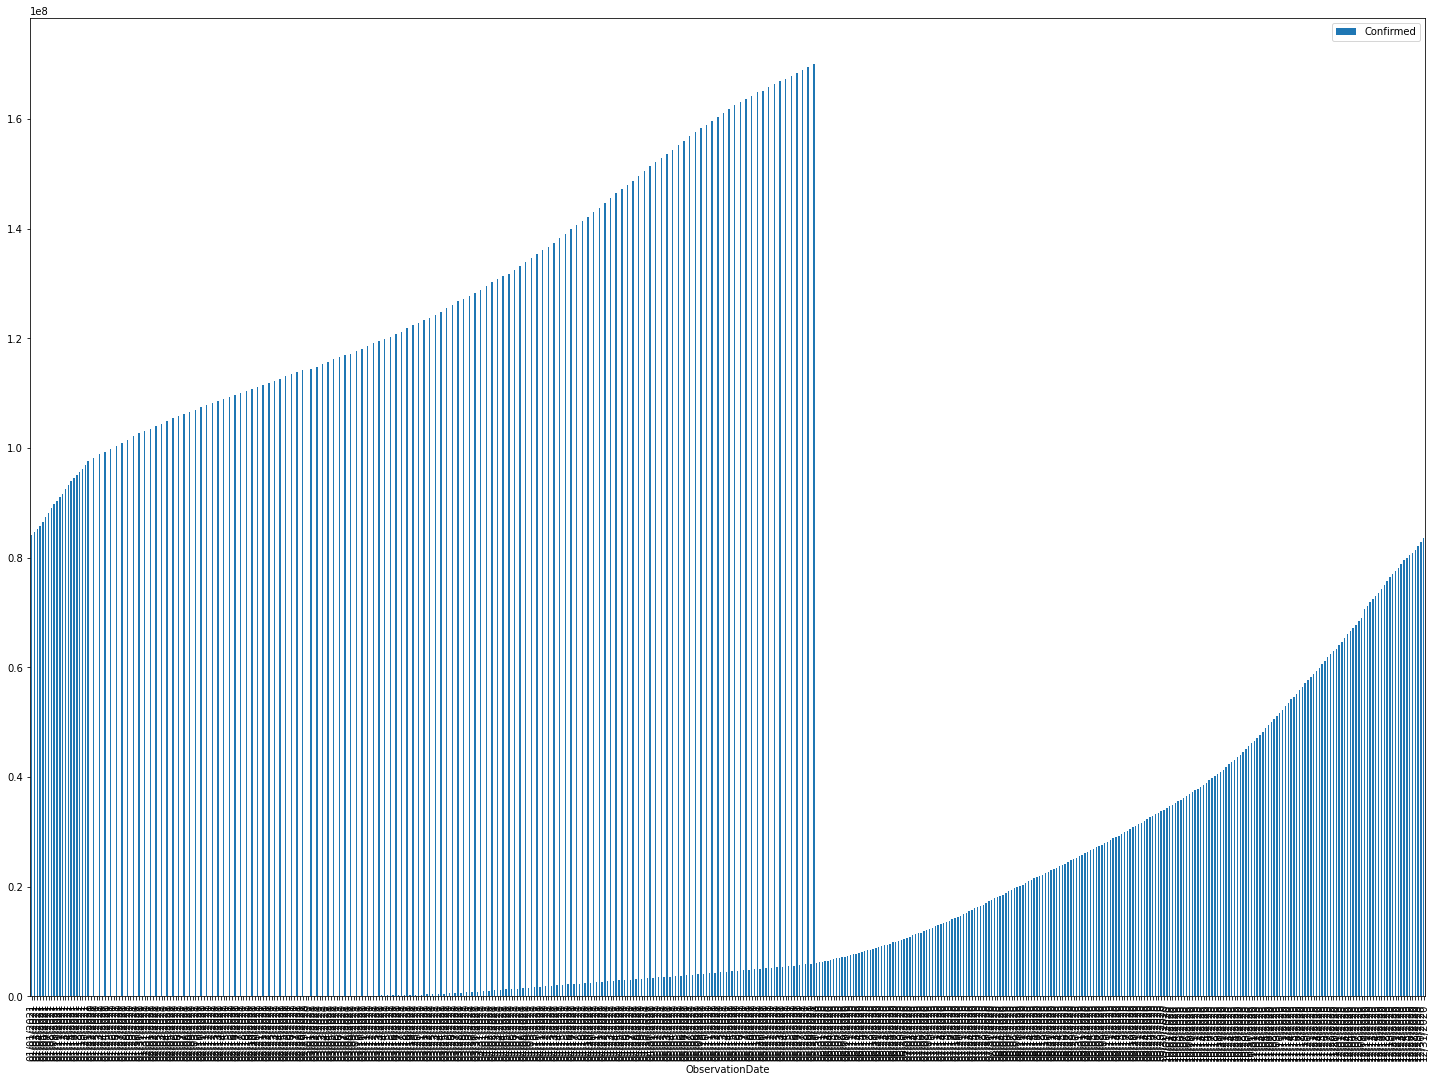

In [15]:
#Pandas Visualization 
confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [16]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0
...,...,...
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0


In [17]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/01/2021,47313005.0
1,01/02/2021,47614297.0
2,01/03/2021,47882779.0
3,01/04/2021,48173187.0
4,01/05/2021,48488548.0
...,...,...
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0


### Making the Prediction using FB Prophet

In [18]:
from prophet import Prophet

In [19]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [20]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [21]:
confirmed.tail(10)

,ObservationDate,Confirmed
484,12/22/2020,78134244.0
485,12/23/2020,78829366.0
486,12/24/2020,79496006.0
487,12/25/2020,79961556.0
488,12/26/2020,80474158.0
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0
493,12/31/2020,83559601.0


In [22]:
deaths.tail(10)

,ObservationDate,Deaths
484,12/22/2020,1722999.0
485,12/23/2020,1736628.0
486,12/24/2020,1748259.0
487,12/25/2020,1756861.0
488,12/26/2020,1764260.0
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0
493,12/31/2020,1825012.0


In [23]:
recovered.tail(10)

,ObservationDate,Recovered
484,12/22/2020,44086740.0
485,12/23/2020,44410880.0
486,12/24/2020,44725552.0
487,12/25/2020,45017158.0
488,12/26/2020,45425322.0
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0
493,12/31/2020,47032627.0


### The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [24]:

confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [25]:
confirmed.head()

,ds,y
0,2021-01-01,84092619.0
1,2021-01-02,84718978.0
2,2021-01-03,85251774.0
3,2021-01-04,85805892.0
4,2021-01-05,86546014.0


In [26]:
confirmed.tail()

,ds,y
489,2020-12-27,80912611.0
490,2020-12-28,81408934.0
491,2020-12-29,82073362.0
492,2020-12-30,82834592.0
493,2020-12-31,83559601.0


#### 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction 
interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
m = Prophet(interval_width=0.95) #Interval width is the prediction accuracy we count on the model
m.fit(confirmed)
future = m.make_future_dataframe(periods=131) #making a dataframe for no. of dates

09:33:08 - cmdstanpy - INFO - Chain [1] start processing
09:33:08 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future.tail(140)

,ds
485,2021-05-21
486,2021-05-22
487,2021-05-23
488,2021-05-24
489,2021-05-25
490,2021-05-26
491,2021-05-27
492,2021-05-28
493,2021-05-29
494,2021-05-30


In [30]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(140)




,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,163899975.606,161930015.524,165928188.819
486,2021-05-22,164518655.695,162636864.986,166669929.382
487,2021-05-23,165077296.799,163084669.222,167094170.779
488,2021-05-24,165647980.723,163604146.262,167639400.401
489,2021-05-25,166271681.670,164248411.229,168278604.707
490,2021-05-26,166931416.396,164943730.811,168956917.922
491,2021-05-27,167604129.522,165676943.795,169750544.369
492,2021-05-28,168266797.237,166164571.818,170147019.243
493,2021-05-29,168885477.326,166844122.193,170920206.060
494,2021-05-30,169444118.429,167614821.025,171462996.668


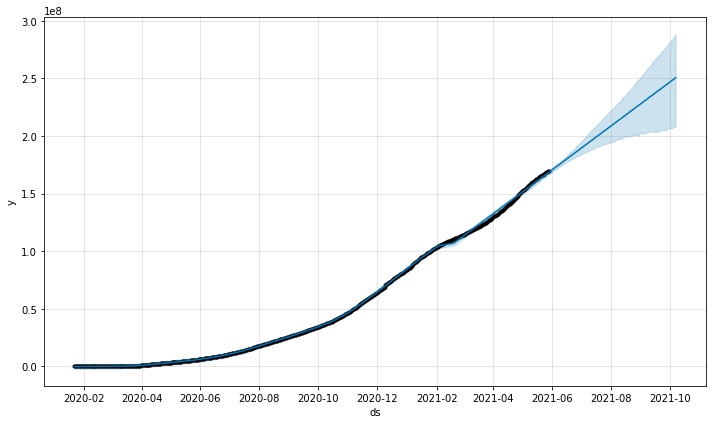

In [31]:
confirmed_forecast_plot = m.plot(forecast)

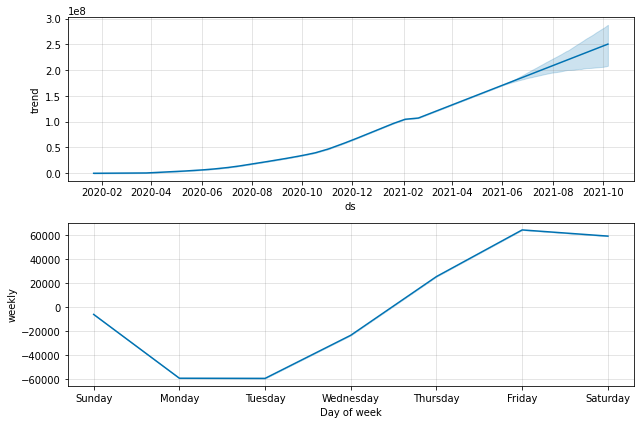

In [32]:
confirmed_forecast_plot =m.plot_components(forecast)

In [33]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [34]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

09:33:10 - cmdstanpy - INFO - Chain [1] start processing
09:33:10 - cmdstanpy - INFO - Chain [1] done processing


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,3411678.073,3388934.597,3438538.686
486,2021-05-22,3422207.036,3395934.921,3444955.674
487,2021-05-23,3430565.690,3405913.585,3457972.192
488,2021-05-24,3440088.791,3416639.170,3462416.932
489,2021-05-25,3452162.693,3427433.352,3476389.914
490,2021-05-26,3464414.008,3439947.695,3487838.938
491,2021-05-27,3476403.601,3451543.812,3500879.560
492,2021-05-28,3488210.993,3464251.482,3513820.529
493,2021-05-29,3498739.957,3473699.314,3524074.692
494,2021-05-30,3507098.611,3482861.444,3531621.937


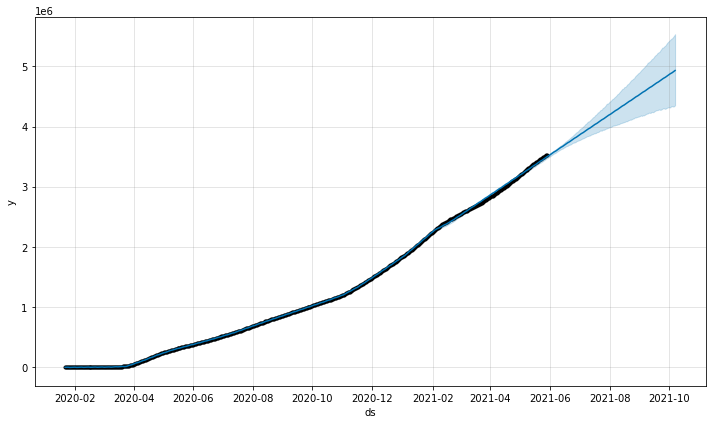

In [36]:
deaths_forecast_plot = m.plot(forecast)

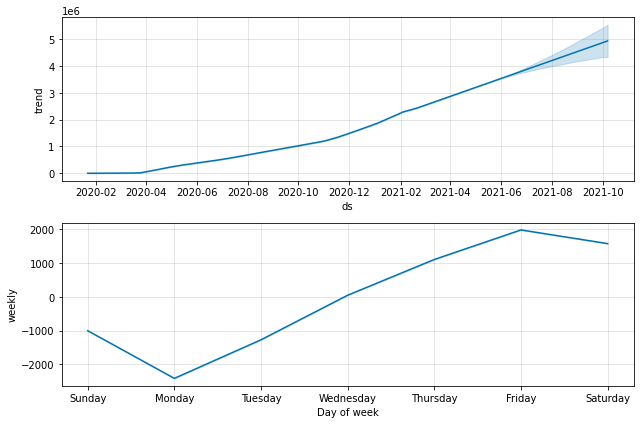

In [37]:
deaths_forecast_plot = m.plot_components(forecast)

#### Forecasting Worldwide Recovered Cases with Prophet (Base model)

In [43]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [44]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

10:07:41 - cmdstanpy - INFO - Chain [1] start processing
10:07:42 - cmdstanpy - INFO - Chain [1] done processing


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,98346882.884,95274019.822,101197822.921
486,2021-05-22,98819350.873,95998325.711,101697532.160
487,2021-05-23,99169589.085,96266593.500,102006153.906
488,2021-05-24,99611331.266,96675719.489,102490903.652
489,2021-05-25,99983280.234,97167731.398,102834266.289
490,2021-05-26,100446580.676,97395170.359,103387639.419
491,2021-05-27,100897332.441,97972734.025,103983113.761
492,2021-05-28,101338623.293,98625298.662,104199919.802
493,2021-05-29,101811091.282,98827073.233,104668412.299
494,2021-05-30,102161329.494,99483305.710,105077995.765


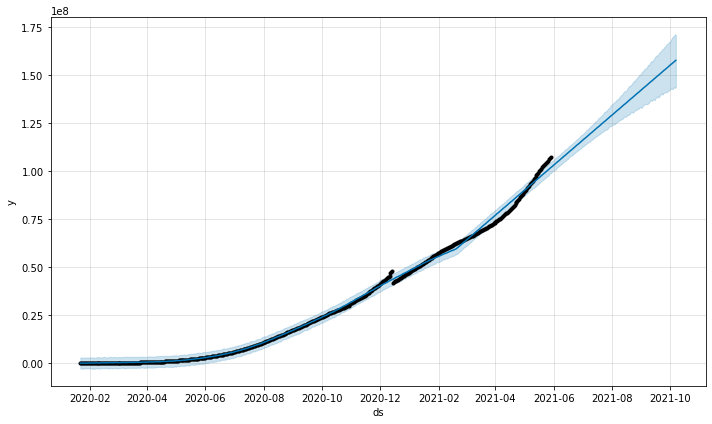

In [46]:
recovered_forecast_plot = m.plot(forecast)

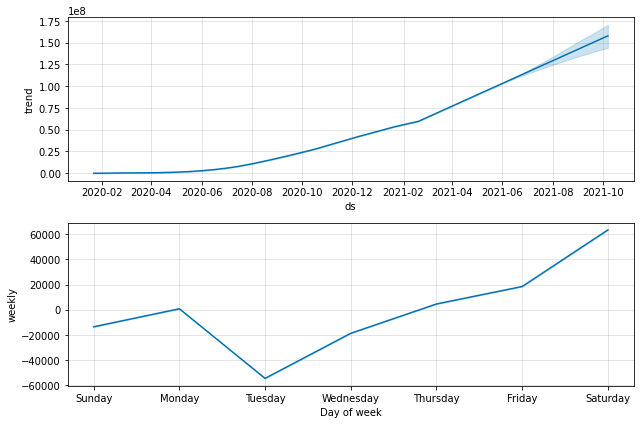

In [47]:
recovered_forecast_plot = m.plot_components(forecast)